# Patient Dataset Regarding No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling + Cleaning</a></li>
<li><a href="#q1">Question 1: Age and Hypertension</a></li>
<li><a href="#q2">Question 2: Gender and Hypertension</a></li>
<li><a href="#q3">Question 3: Age, Gender and Diabetes</a></li>
<li><a href="#q4">Question 4: Neighborhoods and Alcoholism</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I chose the [No-Show Appointments](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv) dataset.

<a id='wrangling'></a>
# Data Wrangling + Cleaning
There are no null values and zero duplicates in this dataset. Although I convert the date columns from a string object to a datetime object, I will not use them in this project.

In [2]:
# Load data
df = pd.read_csv('noShowAppointments.csv')

# Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
# Check for duplicates
sum(df.duplicated())

0

In [4]:
# Convert columns ['ScheduledDay', 'AppointmentDay'] to datatime objects
df[['ScheduledDay','AppointmentDay']] = df[['ScheduledDay','AppointmentDay']].apply(pd.to_datetime)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='q1'></a>
# Question 1

#### Is there correlation between age and hypertension?
--------

In [5]:
# Create new table with age and hypertension data
hyp_grouper = df[['Age', 'Hipertension']]
hyp_grouper = hyp_grouper.groupby(['Age'])
hyp_grouped = hyp_grouper.sum()
hyp_grouped['Hipertension Count'] = hyp_grouper.count()
hyp_grouped.rename(columns={'Hipertension':'Hipertension Sum'}, inplace=True)
hyp_grouped['Percent'] = (hyp_grouped['Hipertension Sum']/hyp_grouped['Hipertension Count'])*100
hyp_grouped = hyp_grouped.reset_index()
hyp_grouped.sort_values(['Age'], ascending=True, inplace=True)
hyp_grouped = hyp_grouped[hyp_grouped['Age'] != -1]
hyp_grouped = hyp_grouped[hyp_grouped['Hipertension Count'] >= 30]
# list(hyp_grouped)
# hyp_grouped.head()
# hyp_grouped.tail()


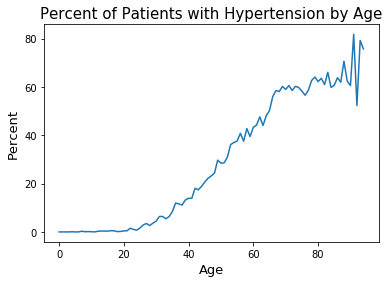

In [6]:
# plot data from the table
plt.plot('Age','Percent', data = hyp_grouped)
plt.title('Percent of Patients with Hypertension by Age', fontsize=15, color='black')
plt.ylabel('Percent', fontsize=13, color='black')
plt.xlabel('Age', fontsize=13, color='black')
plt.show()

<a id='q2'></a>
# Question 2

#### Is there correlation between gender and hypertension?
--------

In [7]:
# Create new table with age, gender and hypertension data
gender_hyp = df[['Age', 'Gender', 'Hipertension']]
mean_gender_hyp = gender_hyp.groupby(['Gender']).mean().reset_index()
mean_gender_hyp['Hipertension'] = mean_gender_hyp['Hipertension'] * 100
mean_gender_hyp

,Gender,Age,Hipertension
0,F,38.893987,21.351615
1,M,33.736863,16.703285


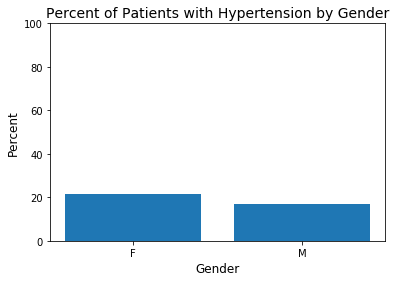

In [8]:
# plot data from the table
plt.bar(mean_gender_hyp['Gender'], mean_gender_hyp['Hipertension'])
plt.title('Percent of Patients with Hypertension by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percent', fontsize=12)
plt.ylim(ymin=0, ymax=100)
plt.show()

In [9]:
# Convert previous table into a pivot table
mean_gender_age_hyp = gender_hyp.groupby(['Age','Gender']).mean().reset_index()
pivoted_mean_gender_hyp = pd.pivot_table(mean_gender_age_hyp,
                                          index=['Age'],
                                          columns=['Gender'],
                                          values=['Hipertension'])

# mean hypertension of females
f_mean = pivoted_mean_gender_hyp['Hipertension', 'F'].mean()

# mean hypertension of males
m_mean = pivoted_mean_gender_hyp['Hipertension', 'M'].mean()

pivoted_mean_gender_hyp['Hipertension', 'F'] = pivoted_mean_gender_hyp['Hipertension', 'F'].fillna(f_mean)
pivoted_mean_gender_hyp['Hipertension', 'M'] = pivoted_mean_gender_hyp['Hipertension', 'M'].fillna(m_mean)
pivoted_mean_gender_hyp = pivoted_mean_gender_hyp.reset_index()
pivoted_mean_gender_hyp = pivoted_mean_gender_hyp[pivoted_mean_gender_hyp['Age'] != -1]
pivoted_mean_gender_hyp = pivoted_mean_gender_hyp[pivoted_mean_gender_hyp['Age'] <= 95]
pivoted_mean_gender_hyp['Hipertension', 'F'] = pivoted_mean_gender_hyp['Hipertension', 'F'] * 100
pivoted_mean_gender_hyp['Hipertension', 'M'] = pivoted_mean_gender_hyp['Hipertension', 'M'] * 100

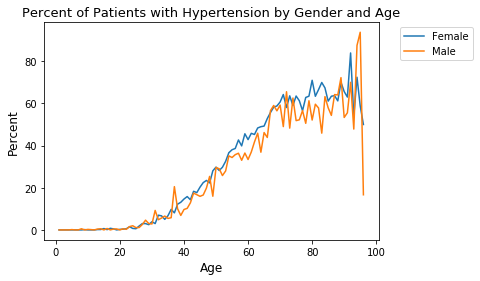

In [10]:
# plot data from the table
plt.plot(pivoted_mean_gender_hyp['Hipertension', 'F'], label='Female')
plt.plot(pivoted_mean_gender_hyp['Hipertension', 'M'], label='Male')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
plt.title('Percent of Patients with Hypertension by Gender and Age', fontsize=13)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Percent', fontsize=12)
plt.show()

<a id='q3'></a>
# Question 3

#### Is there correlation between age, gender and diabetes?
--------

In [11]:
# Create new table with age, gender and diabetes data
table = df[['Age','Gender','Alcoholism','Hipertension','Diabetes']]
table = table.drop(table[table['Diabetes'] == 0].index)
grouped = table.groupby(['Age','Gender'])['Diabetes'].count().reset_index()
pivoted_diabetes = pd.pivot_table(grouped,
                                          index=['Age'],
                                          columns=['Gender'],
                                          values=['Diabetes']).reset_index()
pivoted_diabetes = pivoted_diabetes.fillna(0)
# pd.plotting.scatter_matrix(pivoted_diabetes, figsize=(15,15));

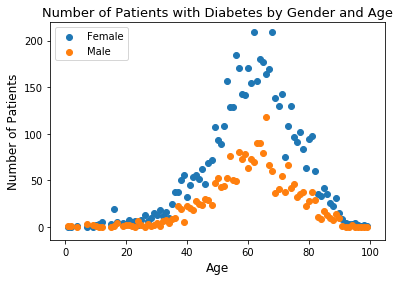

In [12]:
# plot data from the table
plt.scatter(pivoted_diabetes['Age', ''], pivoted_diabetes['Diabetes', 'F'], label='Female')
plt.scatter(pivoted_diabetes['Age', ''], pivoted_diabetes['Diabetes', 'M'], label='Male')
plt.legend(loc='upper left')
plt.title('Number of Patients with Diabetes by Gender and Age', fontsize=13)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.show()

<a id='q4'></a>
# Question 4

#### Do some neighborhoods have higher numbers of alcoholics than others?
---------------

In [13]:
# Create new table with Neighborhood and Alcoholism data
alc_table = df[['Neighbourhood','Alcoholism']]
grouper = alc_table.groupby(['Neighbourhood'])
grouped = grouper.sum()
grouped['Alcoholism Count'] = grouper.count()
grouped.rename(columns={'Alcoholism':'Alcoholism Sum'}, inplace=True)
grouped['Percent'] = (grouped['Alcoholism Sum']/grouped['Alcoholism Count'])*100
grouped.sort_values(['Percent'], ascending=True, inplace=True)
grouped = grouped.reset_index()
grouped = grouped[grouped['Percent'] >= 5]
grouped.tail()

,Neighbourhood,Alcoholism Sum,Alcoholism Count,Percent
76,DA PENHA,172,2217,7.758232
77,PRAIA DO SUÁ,102,1288,7.919255
78,SANTA MARTHA,344,3131,10.986905
79,DO MOSCOSO,54,413,13.075061
80,ESTRELINHA,79,538,14.684015


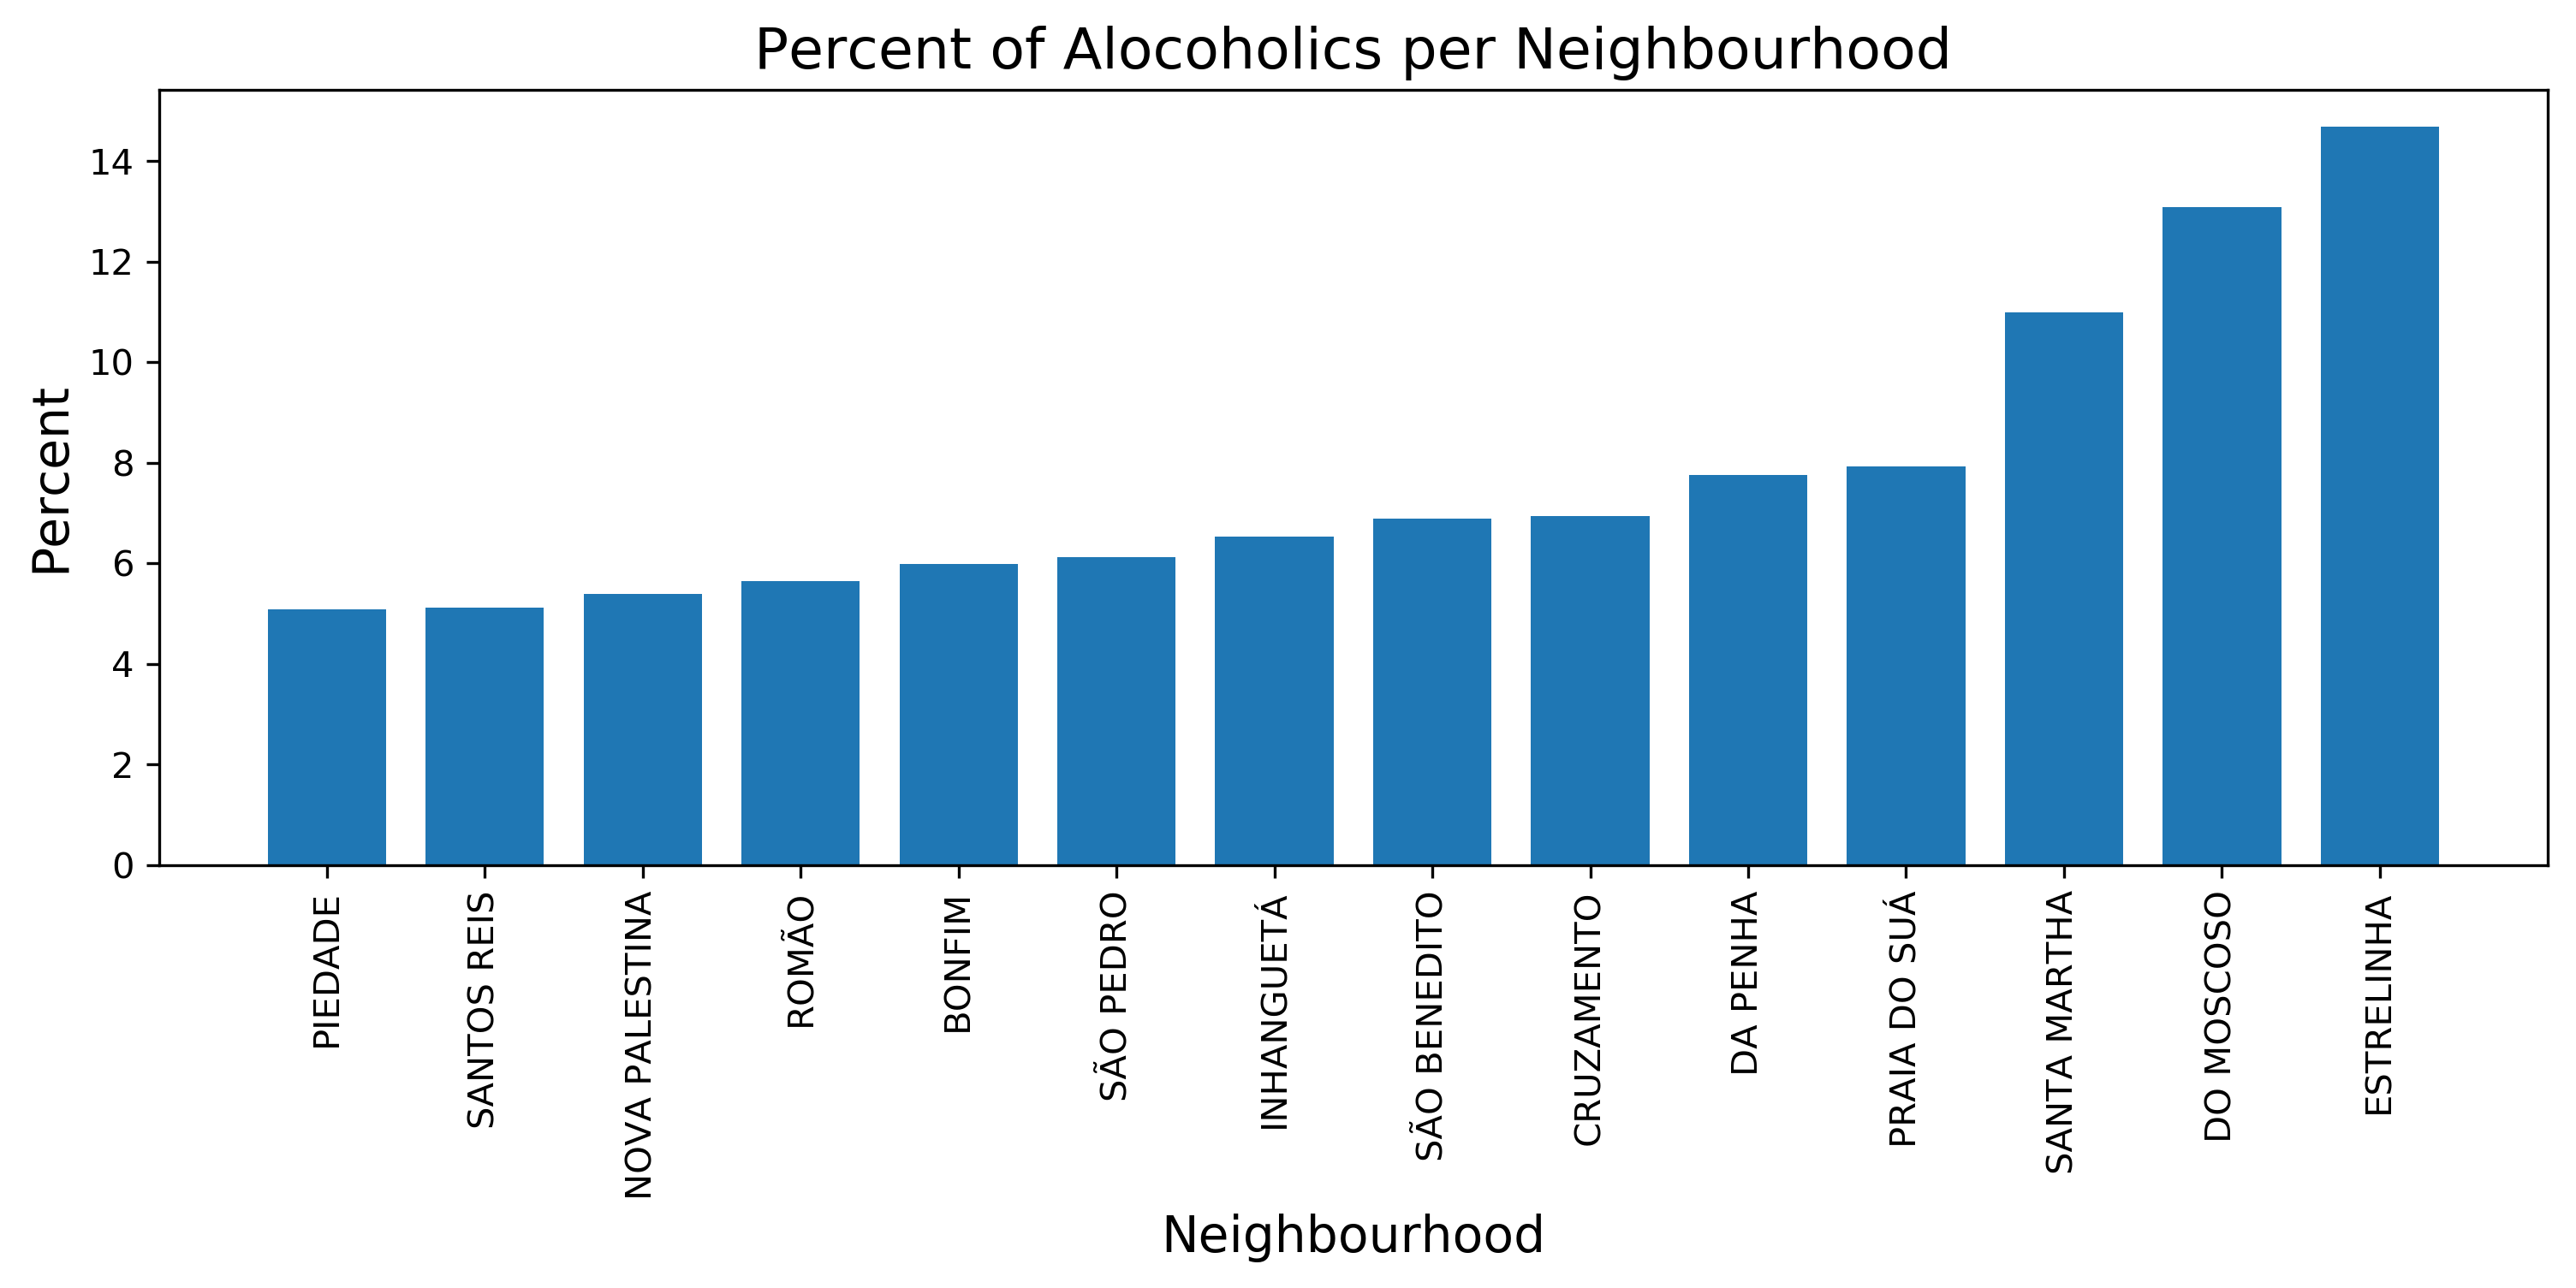

In [14]:
# plot data from the table
ind = np.arange(len(grouped['Neighbourhood']))
width = 0.75
fig = plt.figure(figsize=(12,4), dpi=300)
plt.bar(ind,grouped['Percent'],width)
plt.xticks(ind, grouped['Neighbourhood'], rotation=90)
plt.title('Percent of Alocoholics per Neighbourhood', fontsize=16)
plt.xlabel('Neighbourhood',fontsize=14)
plt.ylabel('Percent',fontsize=14)
plt.show()

In [15]:
# Create new table with Neighborhood, Gender and Alcoholism data
gender_alc_table = df[['Neighbourhood', 'Gender','Alcoholism']]
gender_grouper = gender_alc_table.groupby(['Gender','Neighbourhood'])
gender_grouped = gender_grouper.sum()
gender_grouped['Alcoholism Count'] = gender_grouper.count()
gender_grouped.rename(columns={'Alcoholism':'Alcoholism Sum'}, inplace=True)
gender_grouped['Percent'] = (gender_grouped['Alcoholism Sum']/gender_grouped['Alcoholism Count'])*100
gender_grouped = gender_grouped.reset_index()
gender_grouped = gender_grouped[gender_grouped['Neighbourhood'].isin(['PIEDADE','SANTOS REIS','NOVA PALESTINA','ROMÃO','BONFIM','SÃO PEDRO','INHANGUETÁ','SÃO BENEDITO','CRUZAMENTO','DA PENHA','PRAIA DO SUÁ','SANTA MARTHA','DO MOSCOSO','ESTRELINHA'])]
gender_grouped.sort_values(['Neighbourhood','Gender'], ascending=True, inplace=True)
# gender_grouped.head()

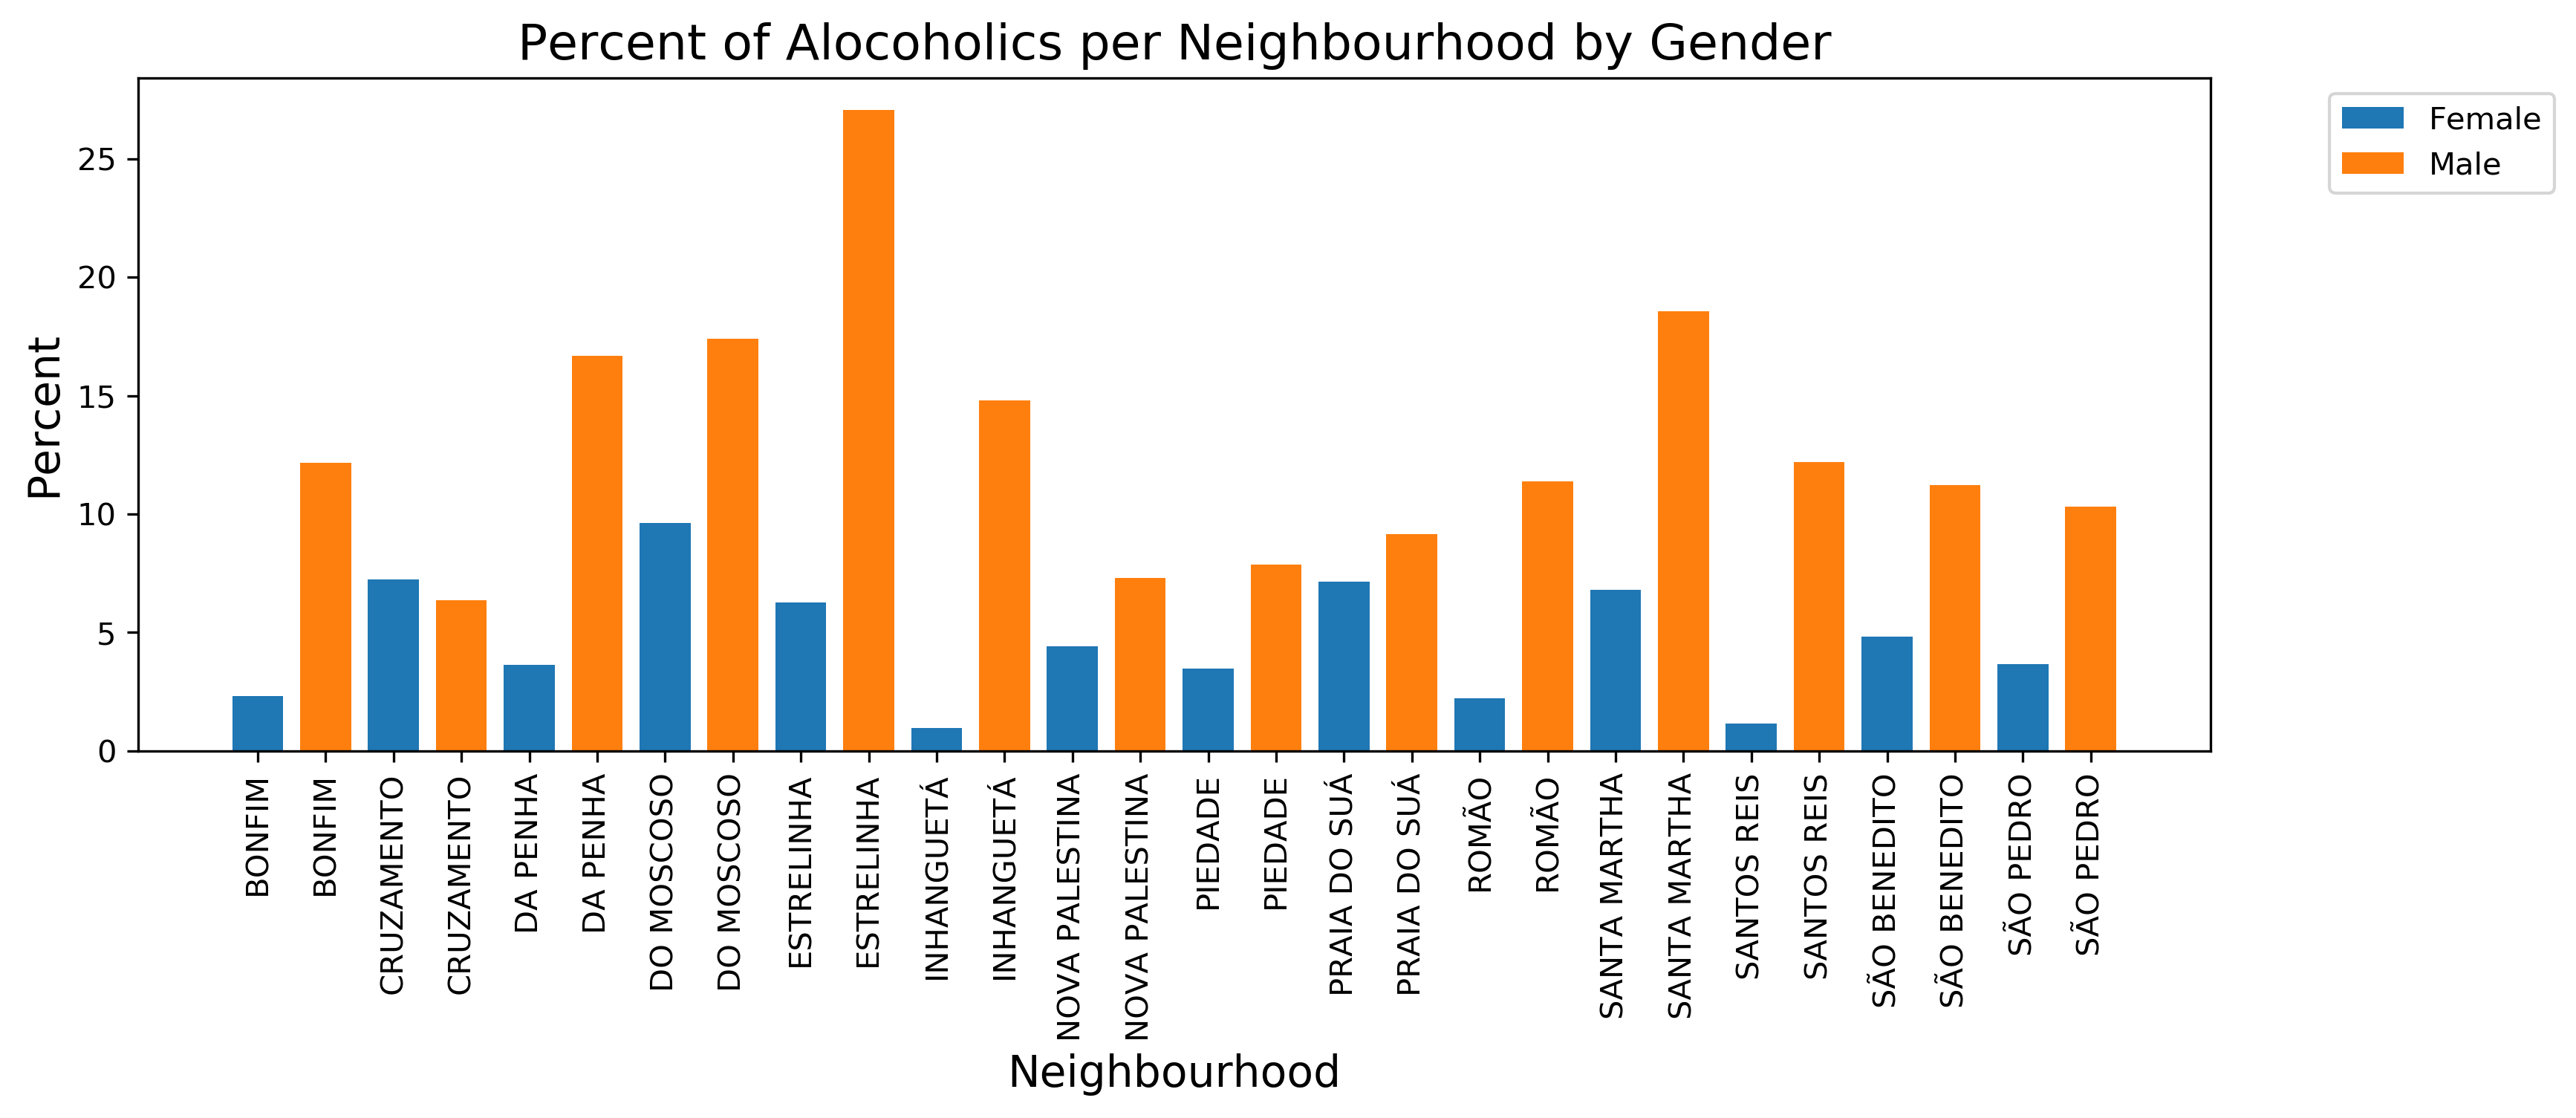

In [16]:
# plot data from the table
val = np.arange(len(gender_grouped[['Gender']]))
width = 0.75
fig = plt.figure(figsize=(12,4), dpi=300)
plt.bar(val,gender_grouped['Percent'].where(gender_grouped['Gender'] == 'F'),width, label='Female')
plt.bar(val,gender_grouped['Percent'].where(gender_grouped['Gender'] == 'M'),width, label='Male')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
plt.xticks(val, gender_grouped['Neighbourhood'], rotation=90)
plt.title('Percent of Alocoholics per Neighbourhood by Gender', fontsize=16)
plt.xlabel('Neighbourhood',fontsize=14)
plt.ylabel('Percent',fontsize=14)
plt.show()

<a id='conclusions'></a>
# Conclusions
---------------

#### <a href="#q1">Question 1: Age and Hypertension</a></li>

Question one hypothesized a correlation between age and hypertension. One limitation in this dataset regards the number of patients per age group. Since some age groups have larger sample sizes than others, I aggregated the data as a mean percent rather than looking at the total number of individuals in each group. 

Another limiation ragards avaialable data within the older samples. Notice there is additional noise at the highst age groups. My guess, this is due to their smaller sample sizes. Therefore, I removed age groups that had less than 30 patients because 30 and above is considered a statisically significant sample size. On the other end of the spectrum, I noticed another sample was less than zero years of age. My assumption, the sample is in utero. I also removed them from the dataset because this age was not clearly defined.

Although more data is needed for this study, the data suggests as age increases mean hypertension increases. One alternative argument is fewer people visit the doctor at younger ages, so data could be inaccurate. However, this argument is a hypothesis in itself, and would require further study.

#### <a href="#q2">Question 2: Gender and Hypertension</a>

Question two hypothesized a correlation between gender and hypertension. The limitaions in this data are similar to the limitation in question one. Therefore, I performed similar taks to massage the dataset. I used the tail data from question one to remove noise by removing ages greater than 95 from the dataset. 

The visiualization in section two is too general. The age groups for this data set range from infants to geriatrics. So broke the data up both by gender and age. This data suggests mean hypertension increase as age increases. Additionally, the data suggests mean hypertension values in females tend to be greater than in males.

#### <a href="#q3">Question 3: Age, Gender and Diabetes</a>

The third question looked for a correlation between age, gender and diabetes? To my knowledge, I did not run into any limitaions in this dataset. I used a scatter plot to display the data by looking at the total number of patients, and using gender as the series. The data suggests, as age increases, the number of patients with diabetes increases. The data also suggests a greater number of females have diabetes compared to males.

#### <a href="#q4">Question 4: Neighborhoods and Alcoholism</a>

Question four looked into alcholism within neighborhoods to determine if some regions have higher percentages of alcoholics than others. I had trouble calculating a mean score for alcoholics within neighborhoods. I had to caluclate the percent based on the sum of alcholoics per neighborhood divided by the total number of patients per neighborhood. After adding the percent series to the dataframe I was able to plot the data. 

Neighborhoods with 5% or more alcoholism were the only data displayed to keep the graphs looking clean. The data suggests Satna Martha, Do Moscoso, and Estrelinha are the neighborhoods with the highest levels of alcoholism; the citizens of these nighborhoods are approximated to be alchoholics; 11%, 13%, and 15% respectively.

I then separated the dataset by gender. The data suggests the percent of male alcoholics tend to be higher than the percent of female alcoholics per neighborhood. Furthermore, the percent of male alcholoics in the dataset more than double the percent of female alcholoics in roughly 10 neighborhoods.